In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [42]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # GPU를 비활성화

In [11]:
import os, sklearn, math
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from joblib import dump, load

tf.random.set_seed(42)

output_dir = "myLearningData/savefig/3line/LargeData/fine"  # 저장할 폴더 이름
if not os.path.exists(output_dir): # 폴더가 없는 경우 폴더를 생성합니다.
    os.makedirs(output_dir)
data = '240206_0236_3line_100ms22C_I2C'
datanickname = '_CNN_Force1_cos_sin'
dataname = data+datanickname
filename = 'myData/'+data+'.csv'
SDreal = pd.read_csv(filename)
SDreal=SDreal.iloc[:,:40]
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx46,Sx47,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r
count,298215.000000,298215.000000,298215.000000,298215.000000,298215.00000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,...,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000,298215.000000
mean,71.579147,70.384356,62.877513,65.825403,60.53938,65.119535,69.816413,70.161085,74.789063,60.592360,...,64.341458,61.322624,62.732384,62.850648,65.060482,69.613117,1.475001,87.208065,177.152189,5.994628
std,1.089497,1.060796,1.220403,0.914536,1.15545,1.052081,1.361106,1.146458,1.000644,0.933616,...,1.131415,1.069492,1.236467,1.123549,1.027373,1.269680,1.179124,43.826821,103.949291,3.162714
min,55.980000,55.240000,45.450000,54.950000,46.55000,50.840000,51.810000,54.760000,59.940000,44.340000,...,48.980000,45.120000,47.450000,46.000000,45.570000,51.120000,-5.308200,15.000000,0.000000,1.000000
25%,71.220000,69.940000,62.210000,65.350000,60.04000,64.670000,69.300000,69.700000,74.250000,60.210000,...,63.800000,60.940000,62.010000,62.380000,64.650000,69.020000,0.355900,47.000000,85.000000,3.000000
50%,71.720000,70.490000,62.910000,65.890000,60.71000,65.200000,69.980000,70.300000,74.830000,60.670000,...,64.390000,61.420000,62.750000,62.950000,65.160000,69.710000,1.343800,87.000000,175.000000,6.000000
75%,72.160000,70.990000,63.630000,66.390000,61.25000,65.710000,70.580000,70.820000,75.410000,61.110000,...,65.000000,61.870000,63.510000,63.470000,65.620000,70.360000,2.473300,127.000000,265.000000,9.000000
max,74.790000,73.840000,67.300000,69.840000,64.09000,69.520000,74.610000,74.230000,78.240000,65.400000,...,68.140000,64.810000,69.810000,66.790000,67.990000,73.620000,4.230200,159.000000,355.000000,11.000000


In [12]:
# SDreal에서 결측값 제거
SDreal = SDreal[~SDreal.isna().any(axis=1)]

# 제거하려는 'theta'와 'z' 조합
#remove_combinations = [(230, 128), (65, 144), (150, 144) ,(270, 8)]

# 각 조합에 대해 데이터 제거
#for theta, z in remove_combinations:
#    SDreal = SDreal[~((SDreal['theta'] == theta) & (SDreal['z'] == z))]

#SDreal = SDreal[~((SDreal <= -400) & (SDreal.columns == "Force")).any(axis=1)]
#SDreal = SDreal[~((SDreal >= 500) & (SDreal.columns == "Force")).any(axis=1)]
#SDreal['Force'] = SDreal['Force'].apply(lambda x: 0 if x < 0 else x)
SDreal = SDreal[~((SDreal <= 1) & (SDreal.columns == "Force")).any(axis=1)]

SDreal = SDreal[SDreal["r"] >= 0]
SDreal = SDreal[SDreal["r"] <= 12]

SDreal = SDreal[SDreal["z"] <= 160]
SDreal = SDreal[SDreal["z"] >= 0]

import numpy as np


toRad = np.pi/180.0
SDreal['cos']=np.cos(SDreal['theta']*toRad)
SDreal['sin']=np.sin(SDreal['theta']*toRad)
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
count,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,...,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,1.736170e+05,173617.000000
mean,71.550038,70.449628,62.772641,65.844989,60.652318,65.095170,69.824863,70.170236,74.876939,60.563995,...,62.662862,62.842158,65.048246,69.579673,2.304949,84.404033,178.248184,7.858954,1.758593e-03,-0.000189
std,1.205639,1.182669,1.217432,0.959187,1.211375,1.182347,1.519184,1.218220,1.068323,1.043627,...,1.278286,1.261793,1.160159,1.418521,0.816071,36.816865,104.252157,2.198691,7.128353e-01,0.701333
min,55.980000,55.240000,45.450000,54.950000,46.550000,50.840000,51.810000,54.760000,59.940000,44.340000,...,47.450000,46.000000,45.570000,51.120000,1.000100,15.000000,0.000000,4.000000,-1.000000e+00,-1.000000
25%,71.250000,70.050000,62.180000,65.390000,60.220000,64.670000,69.400000,69.770000,74.370000,60.210000,...,61.980000,62.410000,64.690000,69.020000,1.573500,55.000000,90.000000,6.000000,-7.071068e-01,-0.707107
50%,71.710000,70.590000,62.850000,65.930000,60.830000,65.210000,70.040000,70.330000,74.940000,60.680000,...,62.700000,62.980000,65.180000,69.730000,2.243300,87.000000,180.000000,8.000000,6.123234e-17,0.000000
75%,72.140000,71.090000,63.490000,66.420000,61.350000,65.720000,70.610000,70.820000,75.500000,61.110000,...,63.430000,63.500000,65.630000,70.370000,2.998900,119.000000,270.000000,10.000000,7.071068e-01,0.707107
max,74.350000,73.840000,67.300000,69.490000,64.090000,69.520000,74.610000,73.520000,78.070000,65.400000,...,69.810000,66.790000,67.990000,73.620000,4.230200,159.000000,355.000000,11.000000,1.000000e+00,1.000000


In [13]:
NUMSEN = 36
# 24개의 특성에 대한 평균과 표준편차를 계산합니다.
mean_values = SDreal.iloc[:, :NUMSEN].mean().values
std_values = SDreal.iloc[:, :NUMSEN].std().values

mean_values = [round(value, 2) for value in mean_values]
std_values = [round(value, 2) for value in std_values]

min_max_F = [round(SDreal.iloc[:, NUMSEN].min(), 2), round(SDreal.iloc[:, NUMSEN].max(), 2)]
min_max_Z = [round(SDreal.iloc[:, NUMSEN+1].min(), 2), round(SDreal.iloc[:, NUMSEN+1].max(), 2)]

# 값을 문자열로 변환
mean_values_str = "float Xmean[36] = {" + ", ".join(map(str, mean_values)) + "};\n"
std_values_str = "float Xstd[36] = {" + ", ".join(map(str, std_values)) + "};\n"
min_max_F_str = "float Fminmax[2]={" + ", ".join(map(str, min_max_F)) + "};\n"
min_max_Z_str = "float Zminmax[2]={" + ", ".join(map(str, min_max_Z)) + "};\n"

file_path = os.path.join(output_dir, f"{dataname}_calculated_values.txt")

# 파일에 쓰기
with open(file_path, "w") as file:
    file.write(mean_values_str)
    file.write(std_values_str)
    file.write(min_max_F_str)
    file.write(min_max_Z_str)

print(f"Data saved to {file_path}")

print("float Xmean[36] = {", ", ".join(map(str, mean_values)), "};")
print("float Xstd[36] = {", ", ".join(map(str, std_values)), "};")
print("float Fminmax[2]={", ", ".join(map(str, min_max_F)), "};")
print("float Zminmax[2]={", ", ".join(map(str, min_max_Z)), "};")

Data saved to myLearningData/savefig/3line/LargeData/fine\240206_0236_3line_100ms22C_I2C_CNN_Force1_cos_sin_calculated_values.txt
float Xmean[36] = { 71.55, 70.45, 62.77, 65.84, 60.65, 65.1, 69.82, 70.17, 74.88, 60.56, 64.54, 65.01, 71.27, 63.38, 72.04, 68.8, 67.84, 58.74, 65.78, 70.81, 63.9, 57.79, 64.15, 62.46, 71.76, 71.32, 72.3, 69.25, 70.58, 61.61, 64.25, 61.31, 62.66, 62.84, 65.05, 69.58 };
float Xstd[36] = { 1.21, 1.18, 1.22, 0.96, 1.21, 1.18, 1.52, 1.22, 1.07, 1.04, 1.07, 1.24, 1.56, 1.41, 2.12, 1.69, 1.56, 1.94, 1.81, 1.97, 2.56, 3.1, 2.84, 1.68, 1.42, 1.41, 1.52, 1.54, 1.39, 1.36, 1.23, 1.23, 1.28, 1.26, 1.16, 1.42 };
float Fminmax[2]={ 1.0, 4.23 };
float Zminmax[2]={ 15, 159 };


In [14]:
def apply_transformation(df, columns, transformation):
    # columns가 제공되지 않았다면 df의 모든 칼럼을 대상으로 함
    if columns is None:
        columns = df.columns
    for column in columns:
        df[column] = transformation(df[column])
    return df

def normalize(column):
    return (column - column.min()) / (column.max() - column.min())
def standardize(column):
    return (column - column.mean()) / column.std()
def submean(column):
    return (column - column.mean())
def normalize_to_neg1_to_1(column):
    normalized = (column - column.min()) / (column.max() - column.min())  # Min-Max normalization (0 to 1)
    return (normalized - 0.5) * 2  # Transform to -1 to 1


SDreal = apply_transformation(SDreal.copy(), ['r', 'Force', 'z'], normalize_to_neg1_to_1)
SDreal.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx10,Sx11,...,Sx50,Sx51,Sx52,Sx53,Force,z,theta,r,cos,sin
count,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,...,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,173617.000000,1.736170e+05,173617.000000
mean,71.550038,70.449628,62.772641,65.844989,60.652318,65.095170,69.824863,70.170236,74.876939,60.563995,...,62.662862,62.842158,65.048246,69.579673,-0.192069,-0.036055,178.248184,0.102558,1.758593e-03,-0.000189
std,1.205639,1.182669,1.217432,0.959187,1.211375,1.182347,1.519184,1.218220,1.068323,1.043627,...,1.278286,1.261793,1.160159,1.418521,0.505292,0.511345,104.252157,0.628198,7.128353e-01,0.701333
min,55.980000,55.240000,45.450000,54.950000,46.550000,50.840000,51.810000,54.760000,59.940000,44.340000,...,47.450000,46.000000,45.570000,51.120000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000e+00,-1.000000
25%,71.250000,70.050000,62.180000,65.390000,60.220000,64.670000,69.400000,69.770000,74.370000,60.210000,...,61.980000,62.410000,64.690000,69.020000,-0.644965,-0.444444,90.000000,-0.428571,-7.071068e-01,-0.707107
50%,71.710000,70.590000,62.850000,65.930000,60.830000,65.210000,70.040000,70.330000,74.940000,60.680000,...,62.700000,62.980000,65.180000,69.730000,-0.230241,0.000000,180.000000,0.142857,6.123234e-17,0.000000
75%,72.140000,71.090000,63.490000,66.420000,61.350000,65.720000,70.610000,70.820000,75.500000,61.110000,...,63.430000,63.500000,65.630000,70.370000,0.237609,0.444444,270.000000,0.714286,7.071068e-01,0.707107
max,74.350000,73.840000,67.300000,69.490000,64.090000,69.520000,74.610000,73.520000,78.070000,65.400000,...,69.810000,66.790000,67.990000,73.620000,1.000000,1.000000,355.000000,1.000000,1.000000e+00,1.000000


In [15]:
SDy = SDreal.iloc[:,36:42]
X = SDreal.iloc[:,0:36]
y = SDreal.iloc[:,[36,37,40,41]]
y

,Force,z,cos,sin
160,-0.828674,-1.0,1.000000,0.000000
161,-0.836290,-1.0,1.000000,0.000000
162,-0.841739,-1.0,1.000000,0.000000
163,-0.846011,-1.0,1.000000,0.000000
164,-0.849602,-1.0,1.000000,0.000000
...,...,...,...,...
289447,-0.720566,1.0,-0.906308,0.422618
289448,-0.721866,1.0,-0.906308,0.422618
289449,-0.722857,1.0,-0.906308,0.422618
292497,-0.994923,1.0,-0.707107,-0.707107


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 분할
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# 12x3 형태로 reshape
X_train_reshaped = X_train_scaled.reshape(-1, 3, 12)
X_valid_reshaped = X_valid_scaled.reshape(-1, 3, 12)
X_test_reshaped = X_test_scaled.reshape(-1, 3, 12)

# 첫 번째 열을 3차원 배열로 변환
X_train_col_expanded = X_train_reshaped[:, :, 0].reshape(-1, 3, 1)
X_valid_col_expanded = X_valid_reshaped[:, :, 0].reshape(-1, 3, 1)
X_test_col_expanded = X_test_reshaped[:, :, 0].reshape(-1, 3, 1)

# np.concatenate를 사용하여 13x3 형태로 만듭니다.
X_train_expanded = np.concatenate((X_train_reshaped, X_train_col_expanded), axis=2)
X_valid_expanded = np.concatenate((X_valid_reshaped, X_valid_col_expanded), axis=2)
X_test_expanded = np.concatenate((X_test_reshaped, X_test_col_expanded), axis=2)

# 출력하여 데이터 세트의 크기 확인
X_sum = len(X_train_expanded) + len(X_valid_expanded) + len(X_test_expanded)
X_train_per = int(len(X_train_expanded) / X_sum * 100)
X_valid_per = int(len(X_valid_expanded) / X_sum * 100)
X_test_per = int(len(X_test_expanded) / X_sum * 100)

print('X_train:', len(X_train_expanded), 'ea', X_train_per, '%   ',
      'X_valid:', len(X_valid_expanded), 'ea', X_valid_per, '%   ',
      'X_test:', len(X_test_expanded), 'ea', X_test_per, '%')
print("X_train expanded shape:", X_train_expanded.shape)
print("X_valid expanded shape:", X_valid_expanded.shape)
print("X_test expanded shape:", X_test_expanded.shape)

X_train: 104169 ea 59 %    X_valid: 34724 ea 20 %    X_test: 34724 ea 20 %
X_train expanded shape: (104169, 3, 13)
X_valid expanded shape: (34724, 3, 13)
X_test expanded shape: (34724, 3, 13)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
import pickle
from joblib import dump, load

file_name = 'myScaler/'+dataname+'_SS.pkl'
dump(scaler, file_name)

['myScaler/240206_0236_3line_100ms22C_I2C_CNN_Force1_cos_sin_SS.pkl']

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Layer
from tensorflow.keras.activations import tanh
import tensorflow.keras.backend as K
from tensorflow import keras



def custom_loss(y_true, y_pred):
    cos_squared = tf.square(y_pred[:, 3])
    sin_squared = tf.square(y_pred[:, 2])
    cos_sin_identity_loss = tf.reduce_mean(tf.square(cos_squared + sin_squared - 1))

    mse_loss = keras.losses.mean_squared_error(y_true, y_pred)

    # cos_sin_identity_loss에 대한 가중치는 튜닝 가능
    return mse_loss + 0.3 * cos_sin_identity_loss

   
    

model = Sequential()
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(3, 13, 1), padding='same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4))
model.compile(optimizer='adam', loss=custom_loss, metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 3, 13, 16)         80        
                                                                 
 flatten_1 (Flatten)         (None, 624)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                40000     
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 64)               

## Callback (best, early stopping, tensorboard)

In [19]:
dataname

'240206_0236_3line_100ms22C_I2C_CNN_Force1_cos_sin'

In [20]:
import math
from tensorflow import keras

# 콜백 정의
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

# ReduceLROnPlateau 콜백 정의
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    patience=5,
    verbose=1,
    factor=0.5,
    min_lr=0.0001
)

# 모델 훈련
history = model.fit(
    X_train_expanded, y_train, epochs=1000,
    validation_data=(X_valid_expanded, y_valid),
    batch_size=256,  # 배치 크기 설정
    callbacks=[early_stopping_cb, reduce_lr]
)


# 모델 평가
mse_test = model.evaluate(X_test_expanded, y_test)

# 샘플 예측
X_new = X_test_expanded[:5]
y_pred = model.predict(X_new)


Epoch 1/1000
407/407 [==============================] - 4s 7ms/step - loss: 0.1013 - mae: 0.1859 - val_loss: 0.0500 - val_mae: 0.1377 - lr: 0.0010
Epoch 2/1000
407/407 [==============================] - 3s 6ms/step - loss: 0.0434 - mae: 0.1289 - val_loss: 0.0395 - val_mae: 0.1229 - lr: 0.0010
Epoch 3/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.0351 - mae: 0.1168 - val_loss: 0.0358 - val_mae: 0.1178 - lr: 0.0010
Epoch 4/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.0305 - mae: 0.1100 - val_loss: 0.0317 - val_mae: 0.1129 - lr: 0.0010
Epoch 5/1000
407/407 [==============================] - 3s 6ms/step - loss: 0.0272 - mae: 0.1046 - val_loss: 0.0286 - val_mae: 0.1068 - lr: 0.0010
Epoch 6/1000
407/407 [==============================] - 6s 15ms/step - loss: 0.0248 - mae: 0.1007 - val_loss: 0.0260 - val_mae: 0.1019 - lr: 0.0010
Epoch 7/1000
407/407 [==============================] - 2s 5ms/step - loss: 0.0231 - mae: 0.0977 - val_loss: 0.0249 -

407/407 [==============================] - 3s 7ms/step - loss: 0.0073 - mae: 0.0585 - val_loss: 0.0118 - val_mae: 0.0681 - lr: 2.5000e-04
Epoch 55/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.0073 - mae: 0.0582 - val_loss: 0.0121 - val_mae: 0.0684 - lr: 2.5000e-04
Epoch 56/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.0072 - mae: 0.0581 - val_loss: 0.0119 - val_mae: 0.0682 - lr: 2.5000e-04
Epoch 57/1000
407/407 [==============================] - 3s 6ms/step - loss: 0.0072 - mae: 0.0580 - val_loss: 0.0120 - val_mae: 0.0684 - lr: 2.5000e-04
Epoch 58/1000
407/407 [==============================] - 3s 7ms/step - loss: 0.0072 - mae: 0.0579 - val_loss: 0.0119 - val_mae: 0.0681 - lr: 2.5000e-04
Epoch 59/1000
401/407 [============================>.] - ETA: 0s - loss: 0.0071 - mae: 0.0578
Epoch 59: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
407/407 [==============================] - 3s 7ms/step - loss: 0.0071 - mae: 0.0578

407/407 [==============================] - 2s 6ms/step - loss: 0.0063 - mae: 0.0545 - val_loss: 0.0117 - val_mae: 0.0666 - lr: 1.0000e-04
Epoch 105: early stopping
1/1 [==============================] - 0s 103ms/step


In [21]:
model.save('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/TACTS/TACTS_v3/myModel/'+dataname+'.h5')

In [22]:
from tensorflow.keras.models import load_model

#model = tf.keras.models.load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
model = load_model('myModel/'+dataname+'.h5', custom_objects={'custom_loss': custom_loss})
scaler = load(file_name)
valid_predictions = model.predict(X_valid_expanded)
valid_predictions_df=pd.DataFrame(valid_predictions)
#valid_predictions_df.columns = ["valid_force","valid_z"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r"]
valid_predictions_df.columns = ["valid_force","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_r","valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_z","valid_cos","valid_sin"]
#valid_predictions_df.columns = ["valid_force","valid_z","valid_r","valid_cos","valid_sin"]
valid_theta_rad = np.arctan2(valid_predictions_df['valid_sin'], valid_predictions_df['valid_cos'])
valid_theta_deg = np.degrees(valid_theta_rad)
valid_predictions_df['valid_theta'] = valid_theta_deg
valid_predictions_df['valid_theta'] /= 180
valid_predictions_df['valid_square'] = valid_predictions_df['valid_cos']**2 + valid_predictions_df['valid_sin']**2
valid_predictions_df.describe()

1086/1086 [==============================] - 2s 1ms/step


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
count,34724.000000,34724.000000,34724.000000,34724.000000,34724.000000,34724.000000
mean,-0.182718,-0.045356,-0.000290,-0.000261,-0.000018,0.996102
std,0.485482,0.502326,0.713265,0.698128,0.578889,0.034929
min,-1.195149,-1.157699,-1.036622,-1.021960,-0.999937,0.009759
25%,-0.615201,-0.462991,-0.723444,-0.689368,-0.499676,0.988413
50%,-0.216538,-0.041947,0.001347,0.000219,0.000274,0.998508
75%,0.236828,0.375236,0.720265,0.687509,0.499340,1.008281
max,1.008188,1.023108,1.020103,1.025394,0.999999,1.104789


In [23]:
k= y_valid.to_numpy()
k_df = pd.DataFrame(k)
k_df.columns  = ["force","z","cos","sin"]
#k_df.columns  = ["z","cos","sin"]

#k_df.columns  = ["force","z","r","cos","sin"]
theta_rad = np.arctan2(k_df['sin'], k_df['cos'])
theta_deg = np.degrees(theta_rad)
k_df['theta'] = theta_deg
k_df['theta'] /= 180
k_df['square'] = k_df['cos']*k_df['cos'] + k_df['sin']*k_df['sin']
k_df

,force,z,cos,sin,theta,square
0,0.000898,-0.111111,0.642788,0.766044,0.277778,1.0
1,-0.701681,-0.888889,0.984808,-0.173648,-0.055556,1.0
2,-0.988855,-0.333333,-0.819152,-0.573576,-0.805556,1.0
3,-0.550850,0.888889,-0.707107,0.707107,0.750000,1.0
4,0.573759,0.555556,-0.866025,0.500000,0.833333,1.0
...,...,...,...,...,...,...
34719,-0.269311,0.000000,-0.996195,-0.087156,-0.972222,1.0
34720,-0.680196,0.111111,0.422618,0.906308,0.361111,1.0
34721,0.766447,-0.444444,0.939693,0.342020,0.111111,1.0
34722,-0.854679,-0.888889,-0.766044,-0.642788,-0.777778,1.0


In [24]:
ValidPre = pd.concat( [k_df,valid_predictions_df],axis=1)
ValidPre.head(5)
corr = ValidPre.corr()
print("corr")
n = k_df.shape[1]
for i in range(0,n):    
    print(format(corr[valid_predictions_df.columns[i]][k_df.columns[i]]*100,'.2f')+'%',k_df.columns[i])
corr_matrix = pd.DataFrame(index=k_df.columns, columns=valid_predictions_df.columns)
loss= model.evaluate(X_valid_expanded, y_valid)
print("검증 손실:", loss)
circle_avg = valid_predictions_df['valid_square'].mean()
circle_std = valid_predictions_df['valid_square'].std()
n = 1.5  # adjust the offset value as needed
print("circle_avg:",round(circle_avg,2),"circle_std:",round(circle_std,2),"      ",round(circle_avg - n*circle_std,2),round(circle_avg + n*circle_std,2))
# 각 열과 행의 상관관계 계산
for k_col in k_df.columns:
    for valid_col in valid_predictions_df.columns:
        corr2 = np.corrcoef(k_df[k_col], valid_predictions_df[valid_col])[0, 1]
        corr_matrix.loc[k_col, valid_col] = corr2
corr_matrix

corr
95.14% force
98.70% z
99.37% cos
99.24% sin
92.38% theta
0.06% square
1086/1086 [==============================] - 4s 3ms/step - loss: 0.0116 - mae: 0.0666
검증 손실: [0.011606956832110882, 0.06659921258687973]
circle_avg: 1.0 circle_std: 0.03        0.94 1.05


,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
force,0.951395,0.012797,0.004766,-0.01927,-0.011304,0.077448
z,0.002927,0.986955,-0.0088,-0.019774,-0.017005,0.022236
cos,0.010164,-0.007224,0.993711,-0.00068,0.000127,-0.033292
sin,-0.019764,-0.020399,-0.003138,0.992423,0.767866,0.042456
theta,-0.011054,-0.023145,-0.040428,0.768568,0.923825,0.048027
square,0.007026,0.007997,-0.057545,-0.023663,-0.065176,0.001196


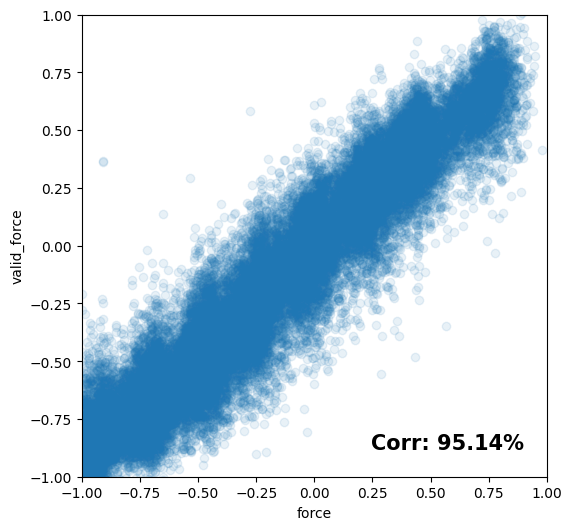

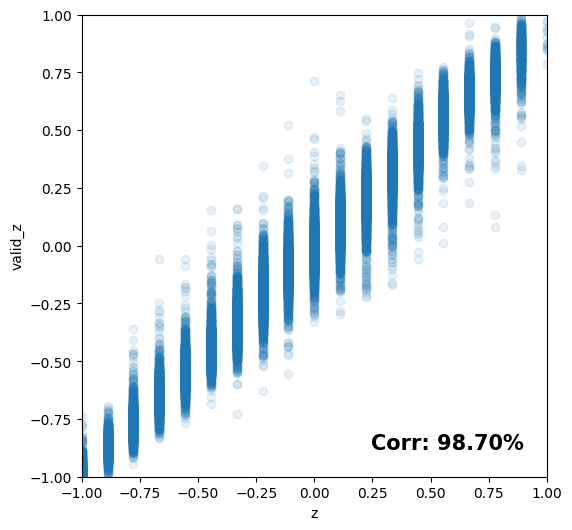

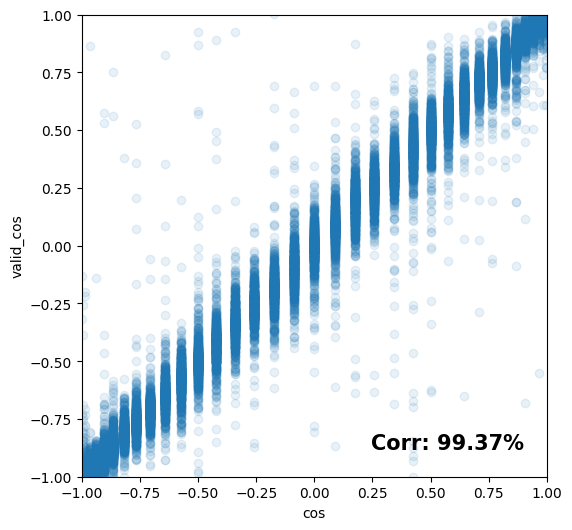

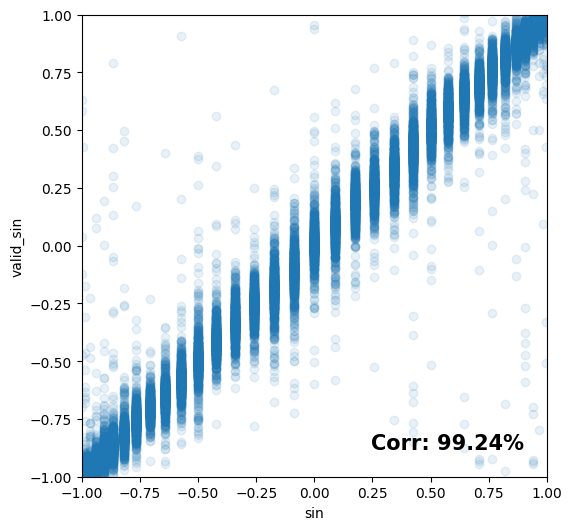

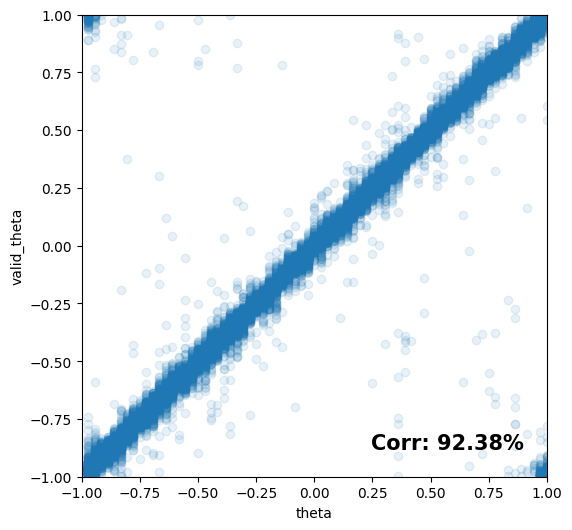

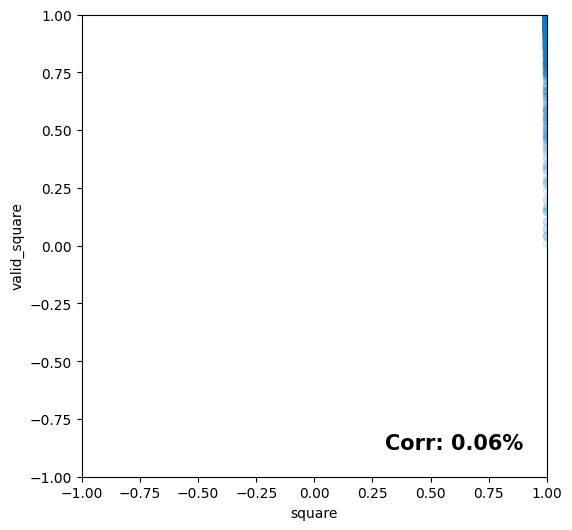

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt

alpa = 0.1

# 폴더가 없는 경우 폴더를 생성합니다.
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fields = ['force','z','cos','sin','theta','square']
#fields = ['force','z','r','cos','sin','theta']
#fields = ['z','cos','sin','theta','square']

for field in fields:
    plt.figure(figsize=(6, 6))  # Set the figure size to 1:1
    plt.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=alpa)
    plt.xlabel(field)
    plt.ylabel(f"valid_{field}")
    plt.xlim(-1, 1)  # x축 범위 설정
    plt.ylim(-1, 1)  # y축 범위 설정

    # Compute the correlation value to be added
    corr_value = format(corr[f"valid_{field}"][field]*100,'.2f') + '%'
    plt.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom', 
             transform=plt.gca().transAxes, fontsize=15, weight='bold')

    plt.savefig(os.path.join(output_dir, f"{dataname}_{field}.png"))  # 플롯을 지정된 폴더에 PNG 파일로 저장
    plt.show()


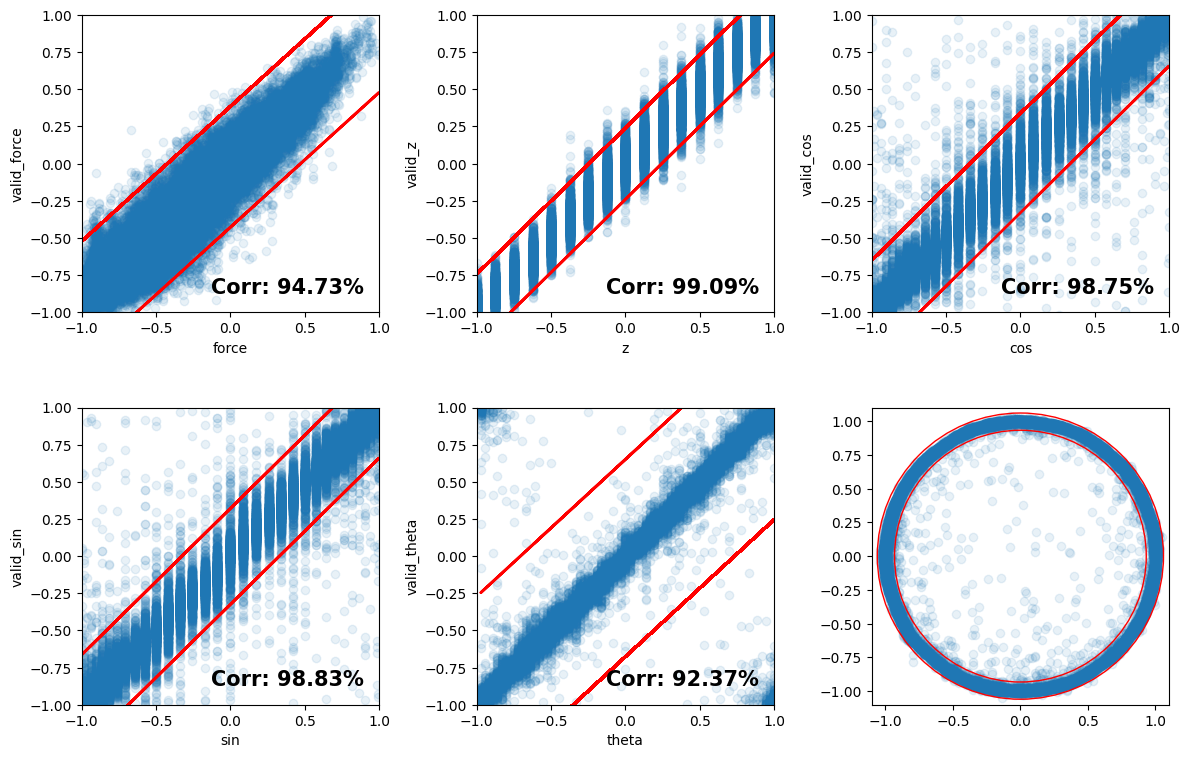

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(ValidPre[field], ValidPre[f"valid_{field}"], alpha=0.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = ValidPre[[field]].values.reshape(-1, 1)
        y = ValidPre[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 3 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 3 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(ValidPre["valid_cos"], ValidPre["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_subplot.png"))
plt.show()


In [62]:
import pandas as pd

# 선형 회귀 모델을 사용하여 'force' 필드에 대한 이상치 탐지
field = 'force'
X = ValidPre[[field]].values.reshape(-1, 1)
y = ValidPre[f'valid_{field}'].values
modelLin = LinearRegression()
modelLin.fit(X, y)
y_pred = modelLin.predict(X)

# 잔차 계산
residuals = y - y_pred
std_dev = np.std(residuals)

# 이상치 임계값 설정 (예: 3 * std_dev)
threshold = 3 * std_dev

# 이상치에 해당하는 인덱스 식별
outlier_indices = np.where((residuals > threshold) | (residuals < -threshold))[0]

# ValidPre에서 이상치에 해당하는 모든 데이터 추출
outliers_force = ValidPre.iloc[outlier_indices]

# 추출된 이상치 데이터 확인
outliers_force



,force,z,cos,sin,theta,square,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
27,-0.167824,-0.500,-1.000000,1.224647e-16,1.000000,1.0,0.333943,-0.373496,-0.999879,-0.098021,-0.968895,1.009366
338,-0.226007,-0.875,0.866025,-5.000000e-01,-0.166667,1.0,-0.641441,-0.854233,0.945461,-0.336512,-0.108844,1.007137
428,-0.042175,-0.625,-0.939693,3.420201e-01,0.888889,1.0,-0.486271,-0.561246,-0.921510,0.335976,0.888714,0.962061
513,-0.276369,-0.500,-0.866025,-5.000000e-01,-0.833333,1.0,-0.748338,-0.226631,-0.948399,-0.294934,-0.904029,0.986446
531,-0.081646,-0.500,1.000000,0.000000e+00,0.000000,1.0,-0.504504,-0.482435,1.002210,0.018547,0.005890,1.004770
...,...,...,...,...,...,...,...,...,...,...,...,...
47152,-0.389372,0.500,-0.965926,-2.588190e-01,-0.916667,1.0,0.056901,0.512430,-0.920755,-0.365286,-0.879781,0.981223
47159,-0.160295,-0.375,-0.984808,1.736482e-01,0.944444,1.0,0.319696,-0.509666,-0.982369,0.186638,0.940237,0.999883
47173,-0.178715,0.875,-0.819152,5.735764e-01,0.805556,1.0,0.228889,0.921430,-0.831861,0.574699,0.807561,1.022272
47382,0.095461,-0.875,1.000000,0.000000e+00,0.000000,1.0,-0.613784,-0.921682,0.994006,-0.001379,-0.000441,0.988050


In [63]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def detect_outliers(dataframe, field, std_dev_multiplier=3):
    # 입력 필드에 대한 선형 회귀 모델 피팅
    X = dataframe[[field]].values.reshape(-1, 1)
    y = dataframe[f'valid_{field}'].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 잔차 계산 및 표준편차 기반 임계값 설정
    residuals = y - y_pred
    std_dev = np.std(residuals)
    threshold = std_dev_multiplier * std_dev

    # 이상치 인덱스 식별
    outlier_indices = np.where((residuals > threshold) | (residuals < -threshold))[0]

    # 이상치가 포함된 데이터 추출
    outliers = dataframe.iloc[outlier_indices].copy()  # 복사본 생성

    return outliers


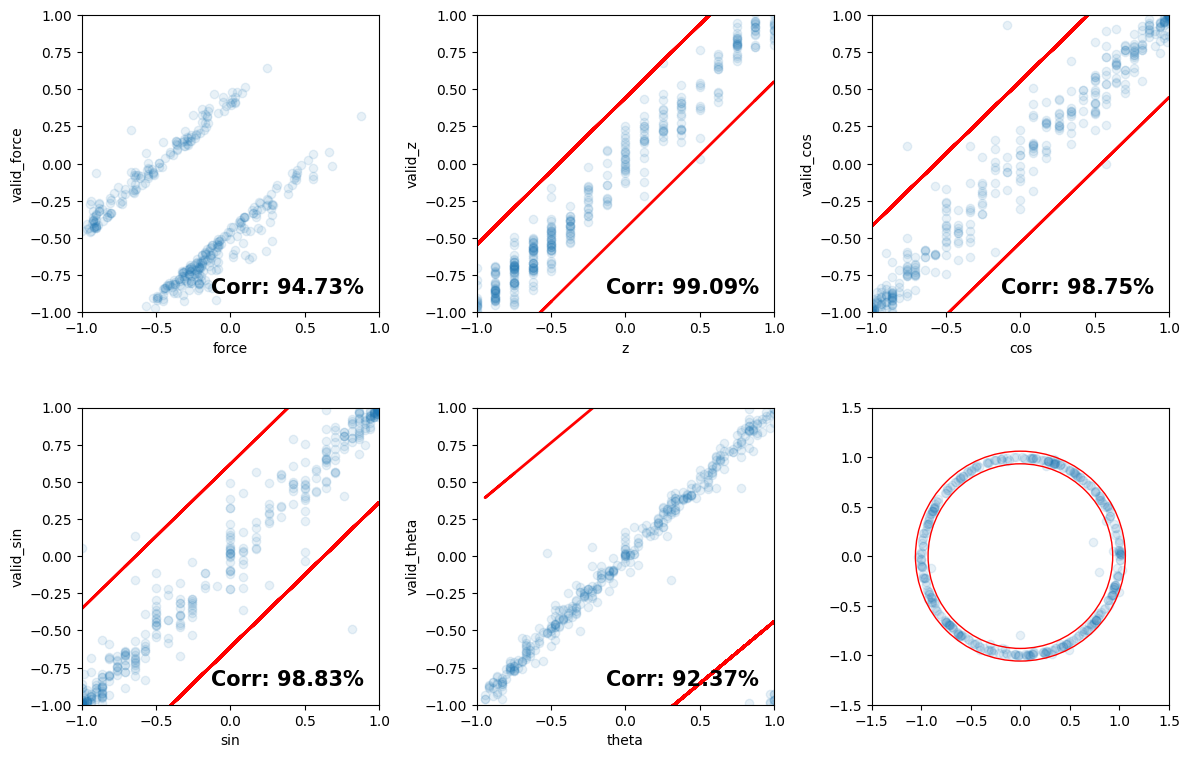

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_force = detect_outliers(ValidPre, 'force')

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_force[field], outliers_force[f"valid_{field}"], alpha=.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_force[[field]].values.reshape(-1, 1)
        y = outliers_force[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_force["valid_cos"], outliers_force["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_forceOut.png"))
plt.show()


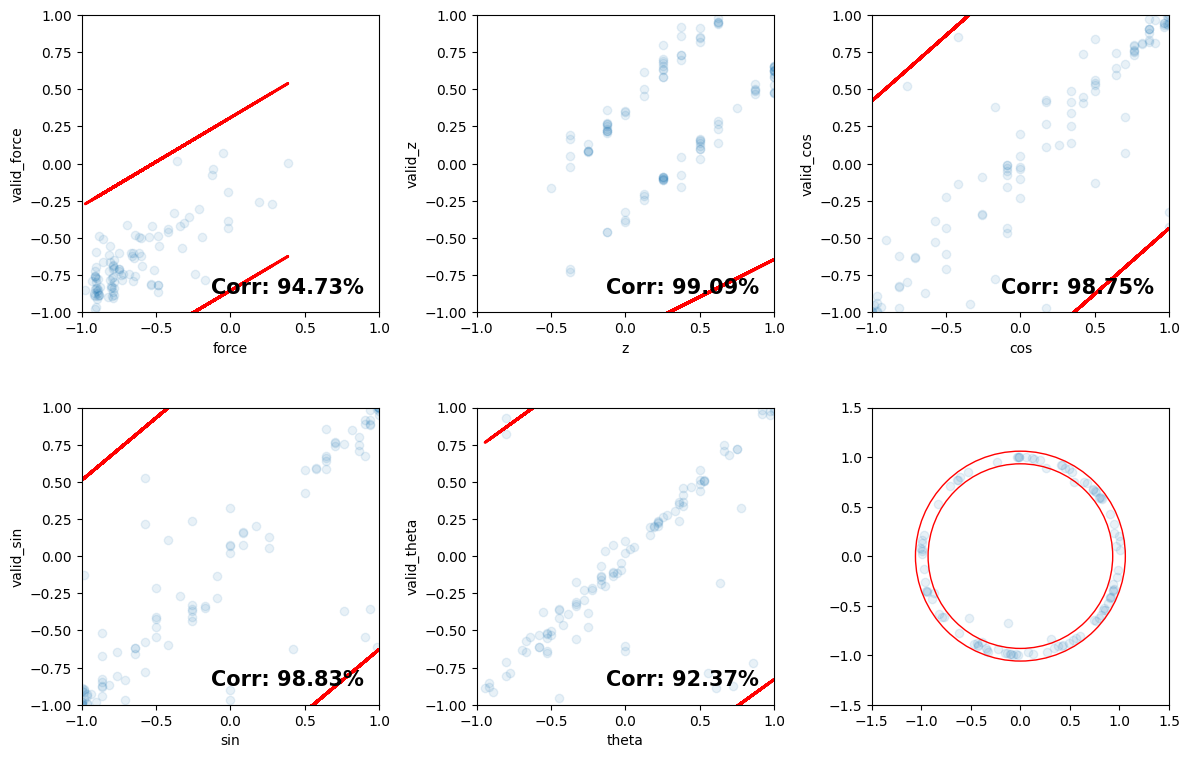

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_z = detect_outliers(ValidPre, 'z',std_dev_multiplier=4)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_z[field], outliers_z[f"valid_{field}"], alpha=.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_z[[field]].values.reshape(-1, 1)
        y = outliers_z[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_z["valid_cos"], outliers_z["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_zOut.png"))
plt.show()


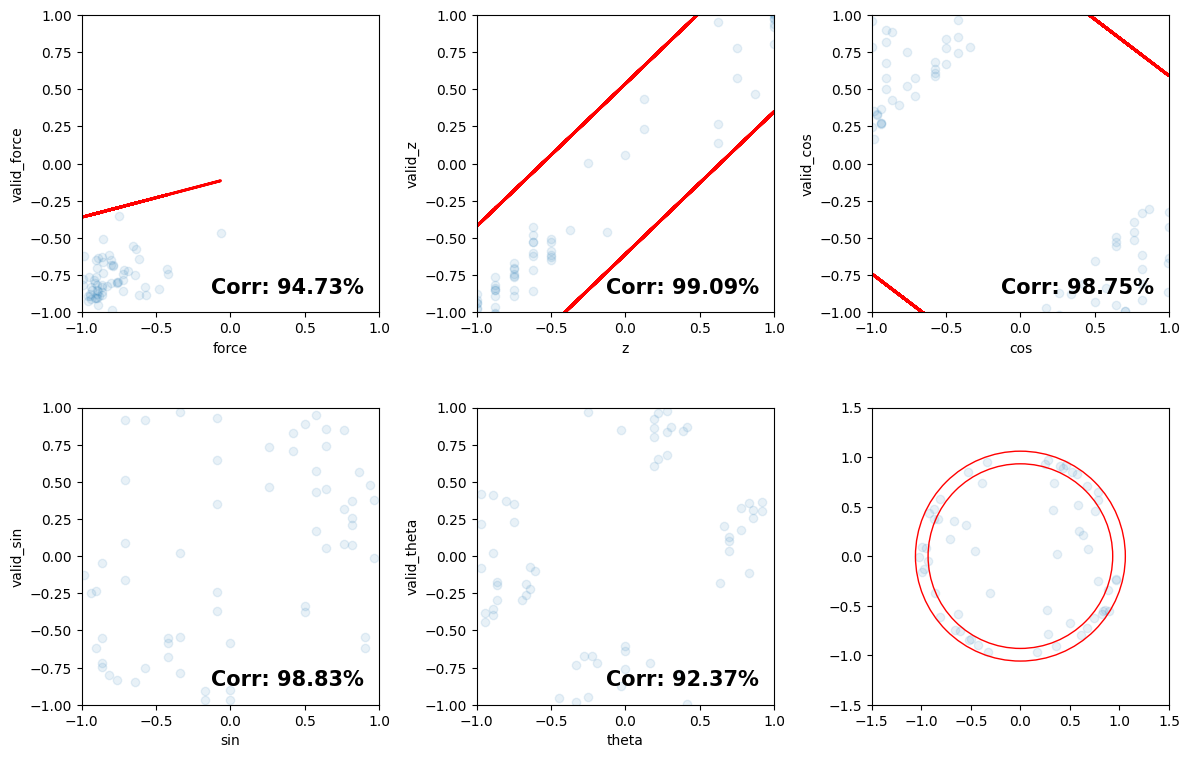

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
alpha=.1
# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_cos = detect_outliers(ValidPre, 'cos',10)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_cos[field], outliers_cos[f"valid_{field}"], alpha=alpha)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_cos[[field]].values.reshape(-1, 1)
        y = outliers_cos[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 4 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 4 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_cos["valid_cos"], outliers_cos["valid_sin"], alpha=alpha)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_cosOut.png"))
plt.show()


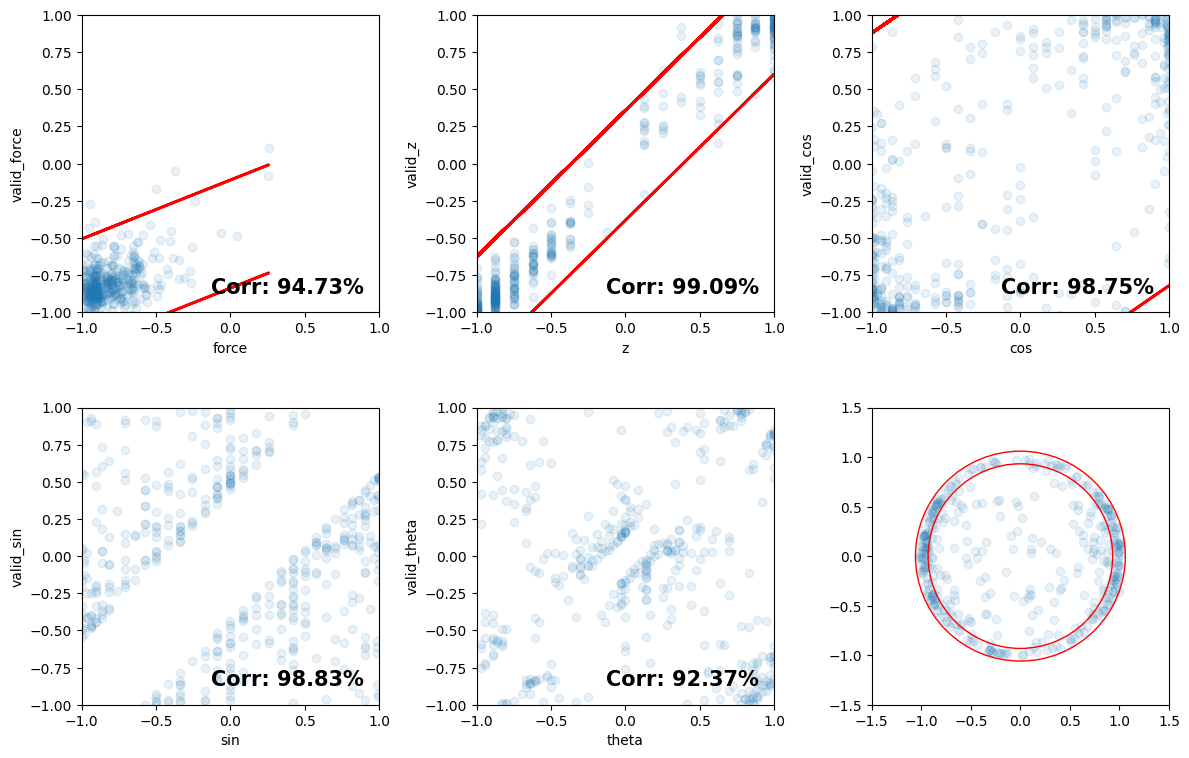

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등
outliers_sin = detect_outliers(ValidPre, 'sin',4)

fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_sin[field], outliers_sin[f"valid_{field}"], alpha=alpha)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)

        # 선형 회귀 및 표준편차 계산
        X = outliers_sin[[field]].values.reshape(-1, 1)
        y = outliers_sin[f"valid_{field}"].values
        modelLin = LinearRegression()
        modelLin.fit(X, y)
        y_pred = modelLin.predict(X)

        residuals = y - y_pred
        std_dev = np.std(residuals)

        # 상한선과 하한선을 그리기 위한 코드
        ax.plot(X, y_pred + 3 * std_dev, color='red', linewidth=2)
        ax.plot(X, y_pred - 3 * std_dev, color='red', linewidth=2)
        ax.set_aspect('equal', 'box')

        # 상관계수 표시
        corr_value = format(corr[f"valid_{field}"][field] * 100, '.2f') + '%'
        ax.text(0.95, 0.05, f'Corr: {corr_value}', ha='right', va='bottom',
                transform=ax.transAxes, fontsize=15, weight='bold')

# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_sin["valid_cos"], outliers_sin["valid_sin"], alpha=alpha)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_cosOut.png"))
plt.show()


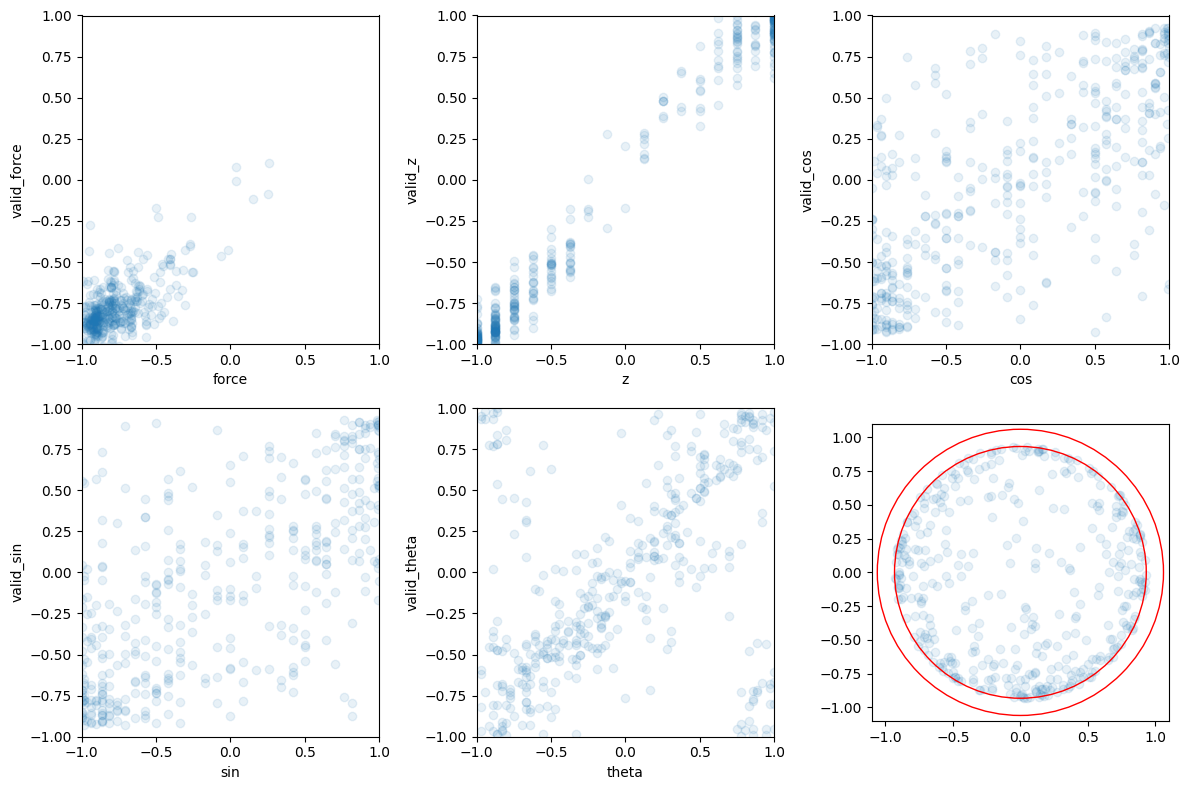

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 데이터 및 파라미터 설정
# 예시: fields, ValidPre, corr 등

import pandas as pd
import numpy as np

def detect_circle_outliers(dataframe, radius, x_field, y_field):
    """
    데이터 프레임에서 원 내부와 외부에 있는 이상치를 탐지합니다.

    :param dataframe: 분석할 데이터 프레임
    :param radius: 원의 반지름
    :param x_field: x 좌표에 해당하는 필드
    :param y_field: y 좌표에 해당하는 필드
    :return: 원 내부 데이터, 원 외부 데이터 (두 개의 데이터프레임)
    """

    # 원의 방정식을 사용하여 데이터 포인트 필터링
    inside_circle = (dataframe[x_field]**2 + dataframe[y_field]**2 <= radius**2)
    
    # 원 내부와 외부 데이터 분리
    inside_data = dataframe[inside_circle]
    outside_data = dataframe[~inside_circle]

    return inside_data

# 사용 예시
# dataframe = pd.DataFrame(...)  # 데이터셋 정의
# radius = ...  # 반지름 정의
# inside_data, outside_data = detect_circle_outliers(dataframe, radius, 'valid_cos', 'valid_sin')

radius = circle_avg - n * circle_std
outliers_circle = detect_circle_outliers(ValidPre,radius,"valid_cos","valid_sin")


fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2행 3열 서브플롯 생성


# 마지막 서브플롯 (scatter와 원 그리기)
if len(fields) > 5:
    ax = axs[1, 2]
    ax.scatter(outliers_circle["valid_cos"], outliers_circle["valid_sin"], alpha=.1)
    inner_circle = plt.Circle((0, 0), circle_avg - n * circle_std, color='red', linestyle='-', fill=False)
    outer_circle = plt.Circle((0, 0), circle_avg + n * circle_std, color='red', linestyle='-', fill=False)
    ax.add_artist(inner_circle)
    ax.add_artist(outer_circle)
    ax.set_aspect('equal', 'box')
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

# 각 필드에 대한 서브플롯 생성
for i, field in enumerate(fields):
    if i < 5:
        ax = axs[i // 3, i % 3]  # 현재 서브플롯 위치 지정
        ax.scatter(outliers_circle[field], outliers_circle[f"valid_{field}"], alpha=0.1)
        ax.set_xlabel(field)
        ax.set_ylabel(f"valid_{field}")
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)




plt.tight_layout()
plt.savefig(os.path.join(output_dir, f"{dataname}_circle.png"))
plt.show()

In [39]:
outliers_circle

,force,z,cos,sin,theta,square,valid_force,valid_z,valid_cos,valid_sin,valid_theta,valid_square
156,-0.564652,-0.875,-0.573576,-0.819152,-0.694444,1.0,-0.696480,-0.978727,-0.212168,-0.925021,-0.571768,0.900680
200,-0.208099,-1.000,0.866025,-0.500000,-0.166667,1.0,-0.808557,-1.085201,0.494373,-0.776703,-0.319573,0.847672
326,-0.623127,1.000,-0.342020,-0.939693,-0.611111,1.0,-0.633340,0.976182,0.110422,-0.911916,-0.461643,0.843785
817,-0.635480,1.000,-0.965926,0.258819,0.916667,1.0,-0.585169,1.003248,-0.867117,-0.075663,-0.972295,0.757617
901,-0.553322,-1.000,-0.906308,0.422618,0.861111,1.0,-0.452727,-0.889691,-0.869139,0.353697,0.876978,0.880505
...,...,...,...,...,...,...,...,...,...,...,...,...
33320,-0.581683,-0.875,-0.087156,-0.996195,-0.527778,1.0,-0.654322,-0.830931,-0.331465,-0.890231,-0.613456,0.902380
33519,-0.389664,-0.250,0.573576,-0.819152,-0.305556,1.0,-0.312112,-0.179277,0.658720,-0.691595,-0.257748,0.912216
33535,-0.399386,-1.000,0.707107,0.707107,0.250000,1.0,-0.673930,-0.992673,0.656684,0.662428,0.251386,0.870045
33583,-0.960018,-1.000,0.906308,0.422618,0.138889,1.0,-0.911673,-1.051384,0.498292,0.383789,0.208910,0.395589


진행 상태: 100.00%

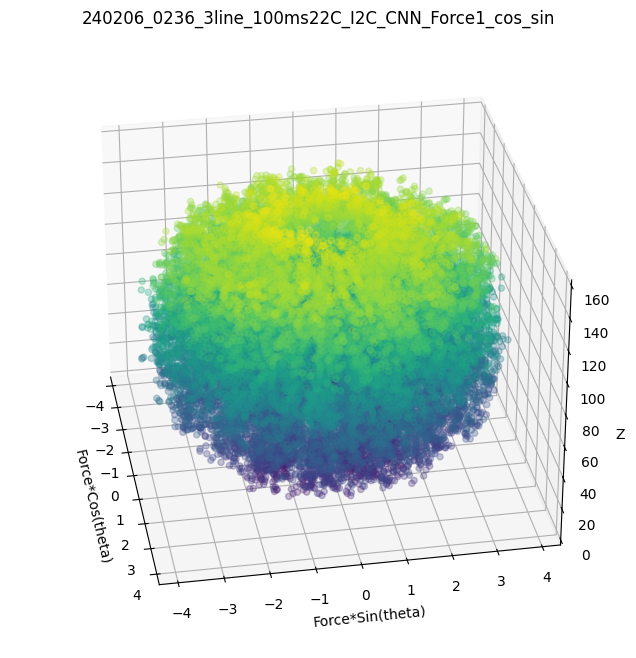

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 'Inferno' 색상 맵 적용
cmap = plt.cm.viridis

# z 값을 0과 1 사이로 정규화
norm_z = (ValidPre['valid_z'] - ValidPre['valid_z'].min()) / (ValidPre['valid_z'].max() - ValidPre['valid_z'].min())

# 색상 맵 적용
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((ValidPre['valid_force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*ValidPre['valid_cos']
sin =  Force*ValidPre['valid_sin']
z = ((ValidPre['valid_z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 


ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)
 

# 애니메이션 생성 및 저장
nSteps = 10
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_valid_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


진행 상태: 100.00%

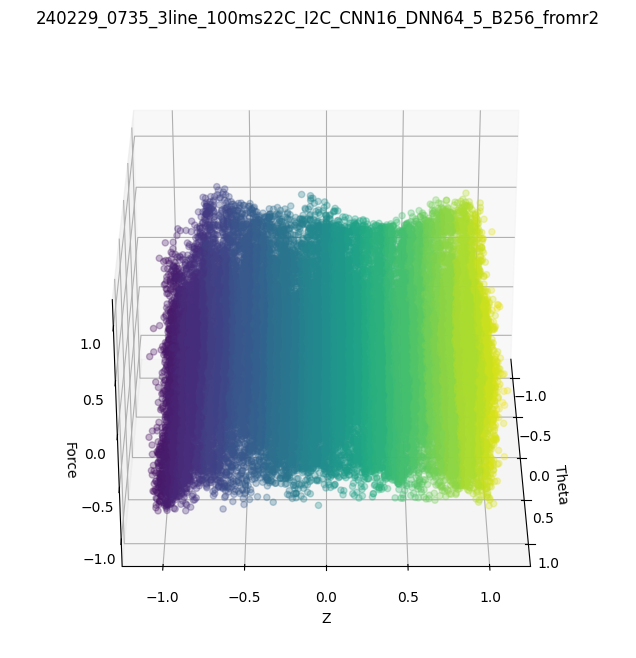

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['valid_theta'], subset['valid_z'], subset['valid_force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_title(dataname)


nSteps = 36
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref_plane.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))


In [79]:
import pandas as pd
from sklearn.cross_decomposition import CCA

# 가정: 'ValidPre' 데이터프레임은 이미 로드되어 있고, 필요한 모든 원시 데이터를 포함하고 있음

# Force, cos, sin, z 값 계산 - 첫 번째 데이터 세트
Force1 = ((ValidPre['valid_force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos1 = Force1 * ValidPre['valid_cos']
sin1 = Force1 * ValidPre['valid_sin']
z1 = ((ValidPre['valid_z']/2 + 0.5) * (152 - 8)) + 8

# Force, cos, sin, z 값 계산 - 두 번째 데이터 세트
Force2 = ((ValidPre['force']/2 + 0.5) * (max_value - min_value)) + min_value + 110
cos2 = Force2 * ValidPre['cos']
sin2 = Force2 * ValidPre['sin']
z2 = ((ValidPre['z']/2 + 0.5) * (152 - 8)) + 8

# 데이터프레임 생성
df1 = pd.DataFrame({'ForceCos': Force1*cos1, 'ForceSin': Force1*sin1, 'Z': z1})
df2 = pd.DataFrame({'ForceCos': Force2*cos2, 'ForceSin': Force2*sin2, 'Z': z2})

# 캐노니컬 상관 분석 (CCA) 수행
# CCA 인스턴스 생성, 여기서 n_components는 분석할 컴포넌트 수, 두 데이터 세트의 변수 수에 맞게 설정
cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

# CCA 적합
cca.fit(df1, df2)

# 결과 변환
df1_c, df2_c = cca.transform(df1, df2)

# CCA 결과 출력
print("Canonical Correlation per component:")
for i, (cc1, cc2) in enumerate(zip(df1_c.T, df2_c.T), start=1):
    corr = np.corrcoef(cc1, cc2)[0, 1]
    print(f"Component {i}: {corr:.3f}")


Canonical Correlation per component:
Component 1: 0.991
Component 2: 0.992
Component 3: 0.992


진행 상태: 100.00%

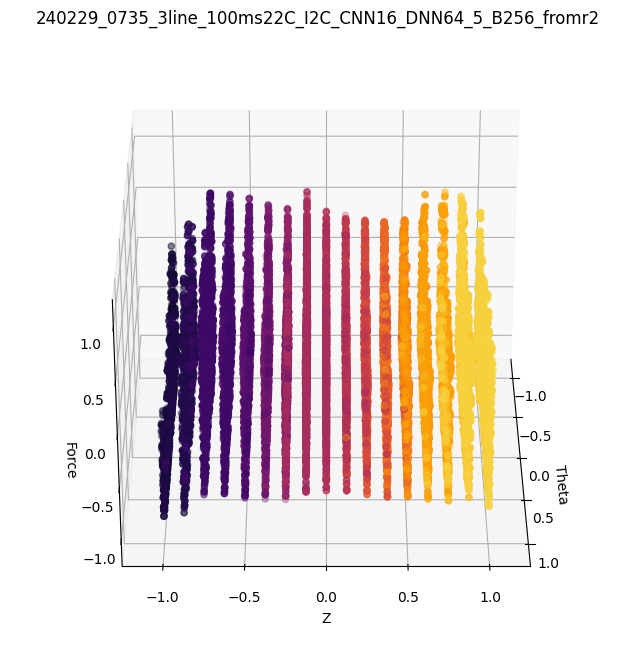

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()
    
# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

z_bins = np.arange(-1.2, 1.2, 0.05)

z_indices = np.digitize(ValidPre['valid_z'], z_bins)

# 색상 맵 설정
colors = plt.cm.inferno(np.linspace(0, 1, len(z_bins)))

# 3D 스캐터 플롯 생성
# 각 점에 색상 배열을 적용하기 위해 z_indices-1을 사용
for i in range(1, len(z_bins)):
    subset = ValidPre[z_indices == i]
    ax.scatter(subset['theta'], subset['z'], subset['force'], color=colors[i-1], alpha=0.3)

# 축 레이블 설정
ax.set_xlabel('Theta')
ax.set_ylabel('Z')
ax.set_zlabel('Force')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_title(dataname)


nSteps = 36
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)
# GIF 애니메이션 생성
ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)

# GIF 저장
ani.save(os.path.join(output_dir, f"{dataname}_Ref.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))


진행 상태: 100.00%

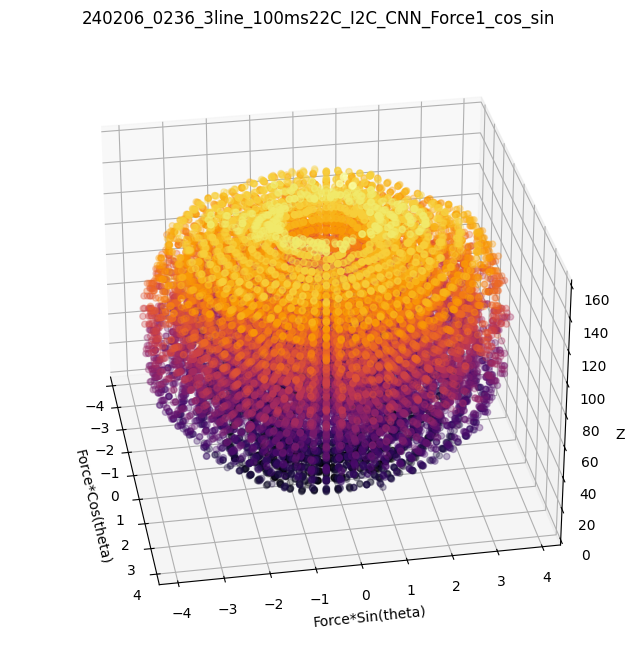

In [29]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import numpy as np
import sys


# 회전 애니메이션 함수 정의
def rotate(angle):
    ax.view_init(30,azim=angle)
    
def update_progress(frame_number, total_frames):
    progress = (frame_number + 1) / total_frames * 100
    sys.stdout.write(f'\r진행 상태: {progress:.2f}%')
    sys.stdout.flush()

# 3D 그래프 생성
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# 'Inferno' 색상 맵 적용
cmap = plt.cm.inferno

# z 값을 0과 1 사이로 정규화
norm_z = (ValidPre['z'] - ValidPre['z'].min()) / (ValidPre['z'].max() - ValidPre['z'].min())

# 색상 맵 적용
colors = cmap(norm_z)


# 최소값과 최대값
min_value = min_max_F[0]
max_value = min_max_F[1]

# 원래 값으로 변환
Force = ((ValidPre['force']/2+0.5) * (max_value - min_value)) + min_value
cos = Force*ValidPre['cos']
sin =  Force*ValidPre['sin']
z = ((ValidPre['z']/2+0.5) * (min_max_Z[1] - min_max_Z[0])) + min_max_Z[0] 


ax.scatter(cos, sin, z, c=colors, alpha=0.3)

# 축 레이블 및 한계 설정
ax.set_xlabel('Force*Cos(theta)')
ax.set_ylabel('Force*Sin(theta)')
ax.set_zlabel('Z')
ax.set_xlim([-max_value, max_value])
ax.set_ylim([-max_value, max_value])
ax.set_zlim([0, 160])
ax.set_title(dataname)

 

# 애니메이션 생성 및 저장
nSteps = 10
totalFrames =np.arange(0, 360, nSteps)
lenFrames = len(totalFrames)

ani = FuncAnimation(fig, rotate, frames=totalFrames, interval=nSteps*20)
ani.save(os.path.join(output_dir, f"{dataname}_3d_scatter_Ref_force_color.gif"), dpi=200, writer='pillow',progress_callback=lambda i, n: update_progress(i, lenFrames))

# 결과 확인
plt.show()


In [ ]:
output_dir